![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [44]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [45]:
penguins_df = pd.get_dummies(penguins_df)



In [46]:

# se escalan los datos 
scaler = StandardScaler()
X = scaler.fit_transform(penguins_df)
# se pasan a dataframe, yo habia escalado los datos pero no los habia pasado  a un dataframe
penguin_preprocessed = pd.DataFrame(data=X, columns=penguins_df.columns)



In [47]:
# mi primera funcion 



def titulos(n_x, n_y, n_t):
    """
    Configura los títulos y etiquetas de un gráfico cartesiano utilizando matplotlib.

    Parámetros:
    -----------
    n_x : str
        Título para el eje X.
    n_y : str
        Título para el eje Y.
    n_t : str
        Título principal del gráfico.

    Retorna:
    --------
    None
        Esta función no devuelve nada, solo configura las etiquetas y el título del gráfico.

    Ejemplo de uso:
    ---------------
    >>> import matplotlib.pyplot as plt
    >>> plt.plot([1, 2, 3], [4, 5, 6])  # Gráfico de ejemplo
    >>> titulos("Eje X", "Eje Y", "Mi Gráfico")
    >>> plt.show()
    """
    plt.xlabel(n_x)
    plt.ylabel(n_y)
    plt.title(n_t)



c:\Users\dmcar\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\dmcar\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\dmcar\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\dmcar\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Wi

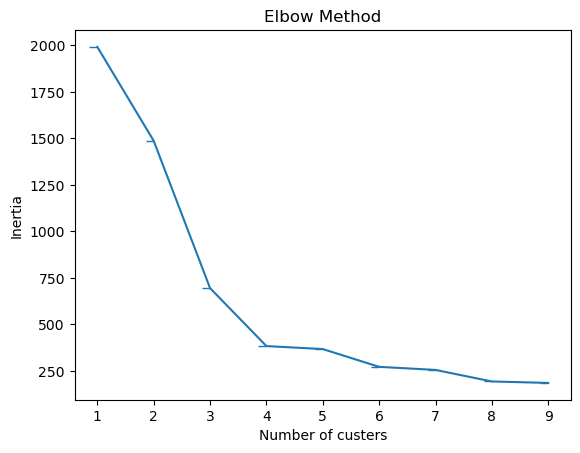

In [48]:
import os
os.environ["OMP_NUM_THREADS"] = "2"

inertia = []

for k in range(1,10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(penguin_preprocessed)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker=0)

titulos(n_x='Number of custers',n_y='Inertia',n_t='Elbow Method')
#plt.xlabel('Number of custers')
#plt.ylabel('Inertia')
#plt.title('Elbow Method')
plt.show()



In [49]:
# se elije el numero de cluster despues del recorrer 
n_cluster = 4 

kmeans = KMeans(n_clusters=n_cluster,random_state=42).fit(penguin_preprocessed)

# se agrega la etiqueta al dataset original
penguins_df['label'] = kmeans.labels_



c:\Users\dmcar\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


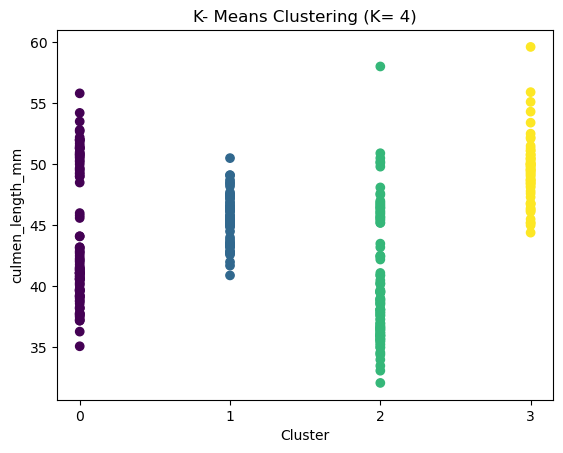

In [50]:
plt.scatter( penguins_df['label'],
             penguins_df['culmen_length_mm'], 
             c=kmeans.labels_, 
             cmap='viridis'
             )
plt.xlabel('Cluster')
plt.ylabel('culmen_length_mm')
plt.xticks(range(int(penguins_df['label'].min()), int(penguins_df['label'].max())+1)) #registrar el numero de cluster por barra
plt.title(f'K- Means Clustering (K= {n_cluster})')
plt.show()

In [51]:
# valores promedios por cluster

numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','label']

stat_penguins= penguins_df[numeric_columns].groupby('label').mean()

stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
label,,,
0,43.878302,19.111321,194.764151
1,45.563793,14.237931,212.706897
2,40.217757,17.611215,189.046729
3,49.473770,15.718033,221.540984
